In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('all_transaction.csv')
df.head(5)
#df.shape

,ATId,BusinessId,DeviceCode,TransactionID,AssociateRefTxnId,ProductId,PayModeId,Amount,TxnSource,Status,IsReversed,TransactionDate,EndPointId,StatusCode,UpdatedOn
0,143453104,343554,MAO4SLWN,2205150001320000003,NaN,49,1,666.0,2,3,1,2022-05-15 00:01:32.453,47,201,2022-05-15 00:01:33.850
1,143453105,343050,MADRKA0,2205150002320000005,NaN,51,1,479.0,2,2,2,2022-05-15 00:02:32.047,6,NaN,2022-05-15 00:02:57.303
2,143453106,190431,AS55HE7M,2205150003490000010,NaN,3039,1,0.0,2,3,3,2022-05-15 00:03:49.210,64,NaN,2022-05-15 00:03:49.570
3,143453107,190431,AS55HE7M,2205150003580000011,NaN,3039,1,0.0,2,3,3,2022-05-15 00:03:58.007,64,NaN,2022-05-15 00:03:58.303
4,143453108,190431,AS55HE7M,2205150004220000012,NaN,3039,1,0.0,2,3,3,2022-05-15 00:04:22.217,64,NaN,2022-05-15 00:04:22.467


In [3]:
df.isnull().sum(axis = 0)

ATId                      0
BusinessId                0
DeviceCode                0
TransactionID             0
AssociateRefTxnId    140078
ProductId                 0
PayModeId                 0
Amount                    0
TxnSource                 0
Status                    0
IsReversed                0
TransactionDate           0
EndPointId                0
StatusCode            68410
UpdatedOn                 5
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141002 entries, 0 to 141001
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ATId               141002 non-null  int64  
 1   BusinessId         141002 non-null  int64  
 2   DeviceCode         141002 non-null  object 
 3   TransactionID      141002 non-null  int64  
 4   AssociateRefTxnId  924 non-null     object 
 5   ProductId          141002 non-null  int64  
 6   PayModeId          141002 non-null  int64  
 7   Amount             141002 non-null  float64
 8   TxnSource          141002 non-null  int64  
 9   Status             141002 non-null  int64  
 10  IsReversed         141002 non-null  int64  
 11  TransactionDate    141002 non-null  object 
 12  EndPointId         141002 non-null  int64  
 13  StatusCode         72592 non-null   object 
 14  UpdatedOn          140997 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 16

In [5]:
final = df.drop(['ATId','DeviceCode','TransactionID','AssociateRefTxnId','TransactionDate','EndPointId','StatusCode','UpdatedOn','TxnSource'],axis = 1)
final.head()

,BusinessId,ProductId,PayModeId,Amount,Status,IsReversed
0,343554,49,1,666.0,3,1
1,343050,51,1,479.0,2,2
2,190431,3039,1,0.0,3,3
3,190431,3039,1,0.0,3,3
4,190431,3039,1,0.0,3,3


In [6]:
final['PayModeId'].value_counts()

1    141002
Name: PayModeId, dtype: int64

### Obseravations:
Every transaction is cash pay on this day

In [8]:
final['Status'].value_counts()
# 1 - inProcess
# 2 - Success
# 3 - Failed
# 4 - Rejected
# 5 - Partial Sucess
# 6 - Cancelled

2    88279
3    52468
6      221
5       28
1        6
Name: Status, dtype: int64

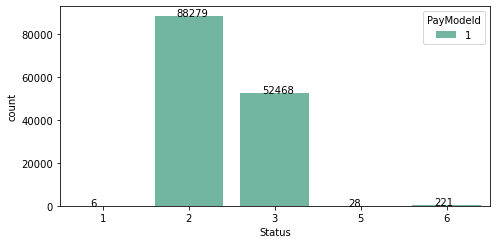

In [11]:
# count plot for PayModeId and Status
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(hue = 'PayModeId',x = 'Status',data = final,palette = 'Set2')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

#sns.countplot(final['PayModeId'])

In [12]:
a = final.ProductId.value_counts()
a[:10]
#len(a)

3041    46101
3039    38328
3047    17826
3037    15550
3046     5133
49       4260
51       2367
3045     2304
81       2139
3049     1716
Name: ProductId, dtype: int64

<IPython.core.display.Javascript object>

([<matplotlib.patches.Wedge at 0x17ca450ac40>,
 [Text(0.8900522104655377, 0.6463799677012048, '3041'),
  Text(-0.33883811820480697, 1.0465126514531133, '3039'),
  Text(-1.0999997888378072, 0.0006815840225271907, '3047'),
  Text(-0.3405668338999565, -1.045951352428668, '3037'),
  Text(0.8893842173585286, -0.6472987825676468, '3046')],
 [Text(0.48548302389029324, 0.3525708914733844, '19.99%'),
  Text(-0.18482079174807653, 0.570825082610789, '19.98%'),
  Text(-0.599999884820622, 0.00037177310319664946, '20.03%'),
  Text(-0.18576372758179446, -0.5705189195065461, '19.97%'),
  Text(0.4851186640137428, -0.3530720632187164, '20.03%')])

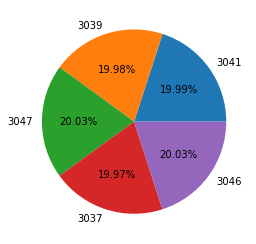

In [252]:
Product_names=final.ProductId.value_counts().index
Product_val=final.ProductId.value_counts().index
plt.pie(Product_val[:5],labels=Product_names[:5],autopct='%1.2f%%')

In [208]:
z = final[final['ProductId']==3041].groupby('Amount').size().reset_index().rename(columns={0:'Count'})
zx = pd.DataFrame(z)
zx
zx['Amount'].sort_values(ascending = False)

1050    10000.0
1049     9999.0
1048     9990.0
1047     9950.0
1046     9927.0
         ...   
4          10.0
3           6.0
2           5.0
1           1.0
0           0.0
Name: Amount, Length: 1051, dtype: float64

In [209]:
amt = 0
for i in range(len(zx)):
    amt += (zx['Amount'][i]*zx['Count'][i])
print(amt)    
#np.sum(zx['Amount']*zx['Count'])

114148675.47


### Observations
1. The product 3041 is used most of the time.
2. The name of the product is AEPS Withdrawal Services.
3. total amount is around 11.5 crore out of 17.96 Cr.

In [213]:
d =final[final['ProductId'] == 3047].groupby('Amount').size().reset_index().rename(columns={0:'Count'})
e = final[final['ProductId'] == 3039].groupby('Amount').size().reset_index().rename(columns={0:'Count'})
#d
f = final[final['ProductId'] == 3037].groupby('Amount').size().reset_index().rename(columns={0:'Count'})
f

,Amount,Count
0,1.0,4708
1,2.0,1
2,40.0,1
3,50.0,2
4,65.0,1
...,...,...
342,4960.0,1
343,4970.0,1
344,4998.0,6
345,4999.0,200


In [214]:
np.sum(f['Amount']*f['Count'])

33556967.0

### Observations:
1. from productId 3037 and 3041 i.e. BC Money transfer and AEPS Widrawal services
2. total 114148675 + 33556967 = 147705642 (around 14.77 Cr out of 17.96)

In [170]:
ans = []
ans1 = []
count = 0
count1 = 0
for i in range(len(final)):
    if final['ProductId'][i] == 3039:
        ans.append(i)
        count += 1
for i in range(len(final)):
    if final['ProductId'][i] == 3047:
        ans1.append(i)
        count1 += 1
print('Count of ProductId_3039 =',count)        
print('Count of ProductId_3047 =',count1)        

Count of ProductId_3039 = 38328
Count of ProductId_3047 = 17826


### Observations
1. There are 97 different products.
2. The two product which are used maximum number of times showing zero transactions.
3. The products are 3039(AEPS Balance Services) ans 3047(AEPS Mini Statement)
4. total count = 38328 + 17826 = 56154 (with 0 amount transaction out of 58496)

In [187]:
ss = df.drop(ans)
final_df = ss.drop(ans1)
final_df.head()
final_df.shape

(84848, 15)

In [78]:
df['Amount'].sort_values(ascending = False)

62450     200000.0
62471     200000.0
90662      49800.0
133483     49800.0
94495      49800.0
            ...   
45961          0.0
101819         0.0
101820         0.0
101821         0.0
109132         0.0
Name: Amount, Length: 141002, dtype: float64

In [185]:
final.Amount.value_counts()

1000.00     6211
5000.00     5693
1.00        4969
10000.00    4406
2000.00     4070
            ... 
543.00         1
266.00         1
5320.00        1
1293.00        1
7281.26        1
Name: Amount, Length: 2841, dtype: int64

In [225]:
f1 = final[final['Amount'] >= 100000].groupby('ProductId').size().reset_index().rename(columns={0:'Count'})
f1
# Name of product :Top-Up PaypointZ Wallet

,ProductId,Count
0,3038,2


In [240]:
df[df['Amount']>=40000].groupby('ProductId').size().reset_index().rename(columns={0:'Count'})

,ProductId,Count
0,87,1
1,368,15
2,3036,19
3,3038,2


In [250]:
g = final[final['ProductId'] == 3036].groupby('Amount').size().reset_index().rename(columns={0:'Count'})
h = final[final['ProductId'] == 87].groupby('Amount').size().reset_index().rename(columns={0:'Count'})
g
ad = np.sum(g['Amount']*g['Count'])
vc = np.sum(h['Amount']*h['Count'])
ad
res = ad + vc
res

2367412.46

## Product catalog

In [256]:
product_data = pd.read_csv('ProductCatalog.csv')
product_data.head()
#product_data.shape

,ProductId,Product,AggregatorId,ServiceId,OperatorId,DomainId,IsActive,IsTerminate,CreatedOn,UpdateOn,UpdateBy
0,3,GST,41.0,5,67.0,9.0,1,0,2017-09-23 11:04:52.170,2020-05-18 00:03:15.723,140
1,4,Loan,41.0,5,67.0,9.0,1,0,2018-08-20 12:22:33.703,2020-05-18 00:03:15.723,140
2,22,MSEDCL - MAHARASHTRA,43.0,1,44.0,2.0,1,0,2016-06-15 10:49:32.087,2022-05-13 13:31:45.333,205
3,25,BSNL Landline - individual,43.0,1,5.0,12.0,1,0,2016-05-30 15:42:11.140,2020-05-18 00:03:15.723,140
4,40,Tata Play,47.0,2,15.0,4.0,1,0,2011-10-20 16:42:15.110,2022-04-21 12:23:49.053,205


In [264]:
product_data.isnull().sum()

ProductId       0
Product         0
AggregatorId    1
ServiceId       0
OperatorId      3
DomainId        2
IsActive        0
IsTerminate     0
CreatedOn       0
UpdateOn        0
UpdateBy        0
dtype: int64

In [258]:
x = product_data[product_data['ProductId'] == 3047].groupby('Product').size().reset_index().rename(columns={0:'Count'})
y = product_data[product_data['ProductId'] == 3039].groupby('Product').size().reset_index().rename(columns={0:'Count'})
z = product_data[product_data['ProductId'] == 3041].groupby('Product').size().reset_index().rename(columns={0:'Count'})
z1 = product_data[product_data['ProductId'] == 3037].groupby('Product').size().reset_index().rename(columns={0:'Count'})
#x
#y
z1

,Product,Count
0,BC Money Transfer,1


In [348]:
final_df=pd.merge(final,product_data,on='ProductId', how='left')
final_df.head()
# final_df.shape

,BusinessId,ProductId,PayModeId,Amount,Status,IsReversed,Product,AggregatorId,ServiceId,OperatorId,DomainId,IsActive,IsTerminate,CreatedOn,UpdateOn,UpdateBy
0,343554,49,1,666.0,3,1,Reliance JIO,6.0,2.0,13.0,3.0,1.0,0.0,2017-03-03 12:04:50.987,2022-05-19 15:57:12.960,352.0
1,343050,51,1,479.0,2,2,Airtel,6.0,2.0,3.0,3.0,1.0,0.0,2011-08-09 15:04:38.647,2022-05-04 10:18:58.587,352.0
2,190431,3039,1,0.0,3,3,AEPS Balance Services,42.0,5.0,68.0,7.0,1.0,0.0,2017-05-02 18:11:57.090,2020-07-07 21:16:27.810,140.0
3,190431,3039,1,0.0,3,3,AEPS Balance Services,42.0,5.0,68.0,7.0,1.0,0.0,2017-05-02 18:11:57.090,2020-07-07 21:16:27.810,140.0
4,190431,3039,1,0.0,3,3,AEPS Balance Services,42.0,5.0,68.0,7.0,1.0,0.0,2017-05-02 18:11:57.090,2020-07-07 21:16:27.810,140.0


In [321]:
final_df.isnull().sum()

BusinessId      0
ProductId       0
PayModeId       0
Amount          0
Status          0
IsReversed      0
Product         1
AggregatorId    1
ServiceId       1
OperatorId      1
DomainId        1
IsActive        1
IsTerminate     1
CreatedOn       1
UpdateOn        1
UpdateBy        1
dtype: int64

In [322]:
final_df[final_df['Amount'] > 20000].groupby('Product').size().reset_index().rename(columns={0:'Count'})
final_df[final_df['Amount'] > 20000].groupby('Product').size().reset_index().rename(columns={0:'Count'})

,Product,Count
0,FLIGHT,8
1,IDFC FIRST Bank - FasTag,15
2,Top-Up PaypointZ Wallet,6
3,Wallet Money Transfer With TopUp,25


<IPython.core.display.Javascript object>

([<matplotlib.patches.Wedge at 0x17cab24f3a0>,
 [Text(0.4209712812390078, 1.0162594060435497, 'AEPS Withdrawal Services'),
  Text(-1.0793633373254699, -0.21207259614958332, 'AEPS Balance Services'),
  Text(0.06396955523813622, -1.0981383774382147, 'AEPS Mini Statement'),
  Text(0.8691873179349586, -0.6741760944597733, 'BC Money Transfer'),
  Text(1.0905504606492011, -0.14387387802452326, 'MATM Cash Withdraw')],
 [Text(0.22962069885764058, 0.5543233123873906, '37.50%'),
  Text(-0.5887436385411653, -0.11567596153613634, '31.18%'),
  Text(0.03489248467534702, -0.5989845695117535, '14.50%'),
  Text(0.4741021734190683, -0.36773241515987637, '12.65%'),
  Text(0.5948457058086551, -0.07847666074064903, '4.18%')])

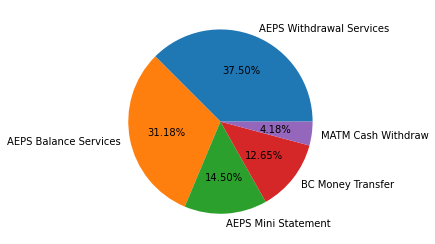

In [323]:
Product_names=final_df.Product.value_counts().index
Product_val=final_df.Product.value_counts().values
plt.pie(Product_val[:5],labels=Product_names[:5],autopct='%1.2f%%')

## Amount Vs Status

In [324]:
df['Status'].value_counts()
# 1 - inProcess
# 2 - Success
# 3 - Failed
# 4 - Rejected
# 5 - Partial Sucess
# 6 - Cancelled

2    88279
3    52468
6      221
5       28
1        6
Name: Status, dtype: int64

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

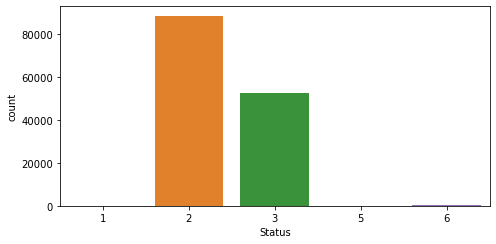

In [325]:
sns.countplot(df['Status'])

In [326]:
status_values=final.Status.value_counts().values
status_labels=final.Status.value_counts().index

<IPython.core.display.Javascript object>

([<matplotlib.patches.Wedge at 0x17c95889a60>,
 [Text(-0.4244080273383064, 1.0148289640775965, '2'),
  Text(0.41863540438556324, -1.017223868278235, '3'),
  Text(1.0999771958435531, -0.0070829813040659976, '6'),
  Text(1.099999563092661, -0.0009804060154776427, '5'),
  Text(1.0999999901622053, -0.00014711610468075485, '1')],
 [Text(-0.2314952876390762, 0.5535430713150525, '62.61%'),
  Text(0.22834658421030718, -0.5548493826972191, '37.21%'),
  Text(0.5999875613692107, -0.003863444347672362, '0.16%'),
  Text(0.5999997616869059, -0.0005347669175332597, '0.02%'),
  Text(0.5999999946339302, -8.024514800768445e-05, '0.00%')])

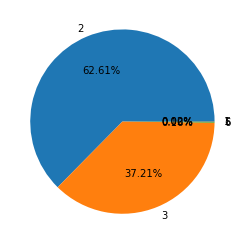

In [327]:
plt.pie(status_values,labels=status_labels,autopct='%1.2f%%')

In [328]:
# For failed Transactions
#dd = final[final['Status'] == 3].groupby('Amount').size().reset_index().rename(columns={0:'Count'})
de = final_df[final_df['Status'] == 3].groupby('Product').size().reset_index().rename(columns={0:'Count'})
de

,Product,Count
0,AEPS Balance Services,17927
1,AEPS Mini Statement,7193
2,AEPS Withdrawal Services,20183
3,Aadhaar Pay,1100
4,Adani Electricity Mumbai Limited,19
5,Airtel,205
6,Airtel DTH,16
7,Airtel Mobile Bill Payment,6
8,Assam Power Distribution Company Ltd (NON-RAPDR),3
9,Axis Bank FASTag,2


In [329]:
np.sum(dd['Amount']*dd['Count'])

65942785.89

### Observations:
1. total of 65942785 rupees transaction is failed.

In [330]:
# for sucessfull transaction
dh = final[final['Status'] == 2].groupby('Amount').size().reset_index().rename(columns={0:'Count'})
dg = final_df[final_df['Status'] == 2].groupby('Product').size().reset_index().rename(columns={0:'Count'})
dg
np.sum(dh['Amount']*dh['Count'])

113263474.18

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

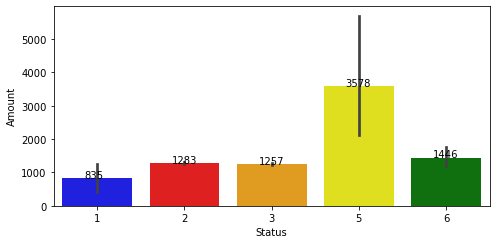

In [342]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.barplot(y = 'Amount',x = "Status",data= final,palette= ['blue','red','orange','yellow','green','green'])
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [343]:
final[['ProductId','Amount']].groupby(['ProductId','Amount']).size().reset_index()

,ProductId,Amount,0
0,22,30.0,1
1,22,40.0,2
2,22,50.0,3
3,22,60.0,1
4,22,70.0,2
...,...,...,...
4722,3049,10000.0,253
4723,3053,100.0,1
4724,3053,20000.0,1
4725,3054,1.0,152


In [344]:
service_data = pd.read_csv('SeviceTypeCatalog.csv')
print(service_data.shape)
service_data

(7, 7)


,ServiceId,ServiceType,UpdateOn,Status,UpdateBy,ServiceTypeID_Old,UpdateBy_Old
0,1,Billing,2015-09-03 12:44:20.920,1,0,2CF1A98B-E329-4EC4-9132-B5D8FD8C973F,B2CBD355-885D-44AB-8246-94E2F3899182
1,2,E-Recharge,2011-04-28 13:34:13.220,1,0,5CAED230-F58C-4C51-B2FC-E549DC1F7C8C,2393F48C-B5E6-472F-AFF8-0CD521C7C0A9
2,3,Booking,2012-05-15 17:19:55.550,1,0,8F76AD01-3B34-44E8-948F-10E82C737011,3031D986-FD59-4D98-8C5C-C87E7460002B
3,4,Online Shopping,2015-08-21 12:39:24.853,1,0,AA11E88C-D242-4599-8F16-8021C4A9D4B9,77D67F9C-42E8-41E9-9A0E-B6C54F211CF3
4,5,Financial Service,2013-11-02 13:33:10.540,1,0,CC269D03-45D8-4921-8442-6FF8BCCF1203,77D67F9C-42E8-41E9-9A0E-B6C54F211CF3
5,6,Insurance,2016-10-01 16:03:01.630,1,140,NaN,NaN
6,7,Loan,2021-08-14 10:25:22.987,0,140,NaN,NaN


In [345]:
final_df1=pd.merge(final_df,service_data,on='ServiceId', how='left')
final_df1.head()
#final_df.shape

,BusinessId,ProductId,PayModeId,Amount,Status_x,IsReversed,Product,AggregatorId,ServiceId,OperatorId,...,IsTerminate,CreatedOn,UpdateOn_x,UpdateBy_x,ServiceType,UpdateOn_y,Status_y,UpdateBy_y,ServiceTypeID_Old,UpdateBy_Old
0,343554,49,1,666.0,3,1,Reliance JIO,6.0,2.0,13.0,...,0.0,2017-03-03 12:04:50.987,2022-05-19 15:57:12.960,352.0,E-Recharge,2011-04-28 13:34:13.220,1.0,0.0,5CAED230-F58C-4C51-B2FC-E549DC1F7C8C,2393F48C-B5E6-472F-AFF8-0CD521C7C0A9
1,343050,51,1,479.0,2,2,Airtel,6.0,2.0,3.0,...,0.0,2011-08-09 15:04:38.647,2022-05-04 10:18:58.587,352.0,E-Recharge,2011-04-28 13:34:13.220,1.0,0.0,5CAED230-F58C-4C51-B2FC-E549DC1F7C8C,2393F48C-B5E6-472F-AFF8-0CD521C7C0A9
2,190431,3039,1,0.0,3,3,AEPS Balance Services,42.0,5.0,68.0,...,0.0,2017-05-02 18:11:57.090,2020-07-07 21:16:27.810,140.0,Financial Service,2013-11-02 13:33:10.540,1.0,0.0,CC269D03-45D8-4921-8442-6FF8BCCF1203,77D67F9C-42E8-41E9-9A0E-B6C54F211CF3
3,190431,3039,1,0.0,3,3,AEPS Balance Services,42.0,5.0,68.0,...,0.0,2017-05-02 18:11:57.090,2020-07-07 21:16:27.810,140.0,Financial Service,2013-11-02 13:33:10.540,1.0,0.0,CC269D03-45D8-4921-8442-6FF8BCCF1203,77D67F9C-42E8-41E9-9A0E-B6C54F211CF3
4,190431,3039,1,0.0,3,3,AEPS Balance Services,42.0,5.0,68.0,...,0.0,2017-05-02 18:11:57.090,2020-07-07 21:16:27.810,140.0,Financial Service,2013-11-02 13:33:10.540,1.0,0.0,CC269D03-45D8-4921-8442-6FF8BCCF1203,77D67F9C-42E8-41E9-9A0E-B6C54F211CF3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

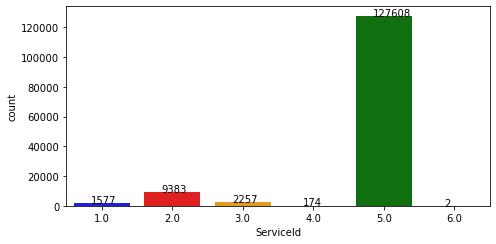

In [346]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x = "ServiceId",data= final_df1,palette= ['blue','red','orange','yellow','green','green'])
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()